## **Project title: Analysing the Clinical status of clients currently on ART in health facility.**

##  **Introduction**
Antiretroviral Therapy (ART) is pivotal in managing HIV/AIDS. Monitoring the clinical progress of ART clients is critical for improving treatment outcomes. This study examines clinical and demographic data from ART clients, aiming to identify trends, adherence levels, and factors influencing treatment success.Data was generated from the EMR_ART tool, which captures patients' histories at health facility settings. We selected some variables in the data set to explore and visualize after de-identifying the clients' identification variables.This study applies the CRISP-DM framework, augmented by metrology principles, to analyze patient characteristics and trends in Antiretroviral Therapy (ART) using structured methodologies. Key indicators such as gender, age, weight, regimen types, TB screening status, nutritional screening status, and months on ART were examined to identify patterns and correlations. This approach provides actionable insights to improve patient care and optimize ART program outcomes.










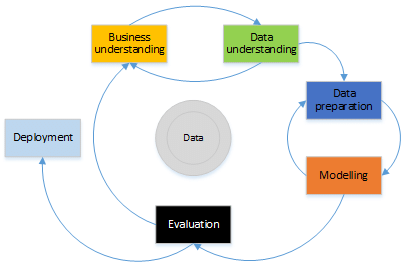









# **2.  Data Understanding**
  Some key indicator were selected that shows ART client clinical improvements and other related variables as follows

  Sex: gender of clients receiving ARV

  Weight: current weight of clients

  Follow update: is the last date of clients receiving ARV

  ARVregimen: is a code or combination of ARV drug regimen that clients are currently receiving.

  Regimens line: show stage of the client after enrolling to ARV

  ART dose days: is a number of ARV dose that provided for clients during service delivery.

  Adherencelevel: is a level of clients adhere to ARV drugs

  ART start date: is date of starting ARV after confirmed HIV positive.

  TB_screening: it shows the clinical symptom to identifiy TB

  Nutritional status of ARV clients

  Months on ART: is total month each clients stay on ARV drugs.

  TPT_start and complete: shows the number of clients receiving TB preventive therapy and completing the drugs to prevent Opportunistic infection




In [1]:
path = 'C:/Users/Sami/Documents/Assinment/2/Dataset/ARTclientclinicalstatusT.xlsx'

# Importing the relevant libraries and modules

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline

In [3]:
df = pd.read_excel(path)

In [4]:
df.head()

,Sex,Weight,Age,FollowUpDate_GC,ARVRegimen,RegimensLine,ARTDoseDays,AdheranceLevel,ARTStartDate_GC,TB_SreeningStatus,NutritionalScrenningStatus,MonthsOnART,TPT_Started_Date,TPT_Completed_Date,viral_load_perform_date,viral_load_status
0,F,64,36,2024-05-03,1j,1,180,NaN,2019-04-15,NaN,NaN,67,2016-07-04,2017-01-05,2024-04-23,Suppressed
1,F,46,55,2024-05-04,1j,1,180,NaN,2007-02-09,TB_Negative,Normal,213,2024-06-08,2024-09-06,2023-09-29,Suppressed
2,F,50,46,2024-05-04,1j,1,180,NaN,2014-03-03,TB_Negative,Normal,128,2024-06-08,2024-09-06,2024-11-13,Suppressed
3,M,78,50,2024-05-06,1j,1,180,Good,2006-07-05,TB_Negative,OverWeight,220,2009-09-11,2010-03-09,2024-03-26,Suppressed
4,F,54,67,2024-05-06,1j,1,180,Good,2009-07-01,TB_Negative,Normal,184,2019-11-15,2020-06-16,1900-01-02,NaN


In [5]:
print(df.shape)

(2991, 16)


In [6]:
df.columns

Index(['Sex', 'Weight', 'Age', 'FollowUpDate_GC', 'ARVRegimen', 'RegimensLine',
       'ARTDoseDays', 'AdheranceLevel', 'ARTStartDate_GC', 'TB_SreeningStatus',
       'NutritionalScrenningStatus', 'MonthsOnART', 'TPT_Started_Date',
       'TPT_Completed_Date', 'viral_load_perform_date', 'viral_load_status'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Sex                         2991 non-null   object        
 1   Weight                      2991 non-null   int64         
 2   Age                         2991 non-null   int64         
 3   FollowUpDate_GC             2991 non-null   datetime64[ns]
 4   ARVRegimen                  2991 non-null   object        
 5   RegimensLine                2991 non-null   int64         
 6   ARTDoseDays                 2991 non-null   int64         
 7   AdheranceLevel              2306 non-null   object        
 8   ARTStartDate_GC             2991 non-null   datetime64[ns]
 9   TB_SreeningStatus           2942 non-null   object        
 10  NutritionalScrenningStatus  2809 non-null   object        
 11  MonthsOnART                 2991 non-null   int64       

In [8]:
df.describe()

,Weight,Age,FollowUpDate_GC,RegimensLine,ARTDoseDays,ARTStartDate_GC,MonthsOnART,TPT_Started_Date,TPT_Completed_Date,viral_load_perform_date
count,2991.000000,2991.000000,2991,2991.000000,2991.000000,2991,2991.000000,2758,2718,2991
mean,63.973253,49.624875,2024-09-18 13:46:09.508525568,1.132732,155.636911,2012-03-21 12:35:52.056168704,151.833166,2017-06-17 10:13:29.282088448,2018-01-31 12:39:12.317880832,2021-06-26 18:31:39.297893632
min,9.000000,2.000000,2024-05-03 00:00:00,1.000000,30.000000,2001-03-10 00:00:00,0.000000,2006-10-27 00:00:00,2007-05-13 00:00:00,1900-01-02 00:00:00
25%,55.000000,43.000000,2024-08-19 00:00:00,1.000000,180.000000,2007-10-08 12:00:00,111.000000,2014-01-08 00:00:00,2015-04-25 18:00:00,2024-03-20 00:00:00
50%,63.000000,50.000000,2024-09-30 00:00:00,1.000000,180.000000,2010-12-22 00:00:00,167.000000,2018-07-06 00:00:00,2019-03-09 00:00:00,2024-05-15 00:00:00
75%,72.000000,56.000000,2024-11-02 00:00:00,1.000000,180.000000,2015-08-20 00:00:00,205.000000,2019-11-30 00:00:00,2020-05-19 18:00:00,2024-08-12 12:00:00
max,150.000000,92.000000,2024-11-29 00:00:00,2.000000,180.000000,2024-11-26 00:00:00,284.000000,2024-11-26 00:00:00,2025-02-03 00:00:00,2111-08-19 00:00:00
std,13.563031,11.007220,NaN,0.339341,44.613396,NaN,61.401785,NaN,NaN,NaN


In [9]:
df.isnull().sum()

Sex                             0
Weight                          0
Age                             0
FollowUpDate_GC                 0
ARVRegimen                      0
RegimensLine                    0
ARTDoseDays                     0
AdheranceLevel                685
ARTStartDate_GC                 0
TB_SreeningStatus              49
NutritionalScrenningStatus    182
MonthsOnART                     0
TPT_Started_Date              233
TPT_Completed_Date            273
viral_load_perform_date         0
viral_load_status              73
dtype: int64

## **3. Data Preprocessing**
As observed the data set column has many missing value which needs to be cleaned. we try to manage the missing values through different data-cleaning techniques. we perform the following activies to handle and prepare data set for analysis.

 -Weight: is has 96 null value
         we fill the missing value by mean of the weight
   

*   -AdheranceLevel: is the level clients adhere to their daily doses, so we fill the missing value depending on dose of ART means clients who receive ">=90 dose" are expected to well in clinical and fill by 'good' and those who receive "<90 doses" are filled by 'poor' adherence level.
*   TB_screening and nutritional Screening use to fill missing value by "unknown"
*   TPT_Started_Date: the missing value of tpt_start date is fill by " not start_tps"
*   TPT_Completed_Date: about 273 missing value are expected not complete, therefore we fill the column by 'not complete'

*   viral_load_status: viral load status shows the clinical improvement of clients, we fill the missing value of the column by 'noresult'
*   Child Disclosuer Status column is removed from the dataset.







In [10]:
#remove any leading or trailing whitespace characters from columns.
df.columns = df.columns.str.strip()

In [11]:
df.columns = df.columns.str.lower()

In [12]:
df.columns

Index(['sex', 'weight', 'age', 'followupdate_gc', 'arvregimen', 'regimensline',
       'artdosedays', 'adherancelevel', 'artstartdate_gc', 'tb_sreeningstatus',
       'nutritionalscrenningstatus', 'monthsonart', 'tpt_started_date',
       'tpt_completed_date', 'viral_load_perform_date', 'viral_load_status'],
      dtype='object')

In [13]:
#calculating mean of the weight
df['weight'].mean()

63.973253092611166

In [14]:
#to fill weight with null values by their mean
if 'weight' in df.columns:
    df['weight'] = df['weight'].fillna(df['weight'].mean())
else:
    print("Column 'weight' not found in DataFrame.")

In [15]:
#replacing the nutrtitional_screeing_status column containing null value with unknown
if 'nutritionalscrenningstatus' in df.columns:
    df.loc[:, 'nutritionalscrenningstatus'] = df['nutritionalscrenningstatus'].fillna('Unknown')
else:
    print("Column 'nutritionalscrenningstatus' not found in DataFrame.")

In [16]:
#Fill tb_screening tresult with null value by unknown
if 'tb_sreeningstatus' in df.columns:
    df.loc[:, 'tb_sreeningstatus'] = df['tb_sreeningstatus'].fillna('Unknown')
else:
    print("Column 'tb_sreeningstatus' not found in DataFrame.")

In [17]:
#fill tpt_start_date with null value by 'not_start'
if 'tpt_started_date' in df.columns:
    df.loc[:, 'tpt_started_date'] = df['tpt_started_date'].fillna('not_start')
else:
    print("Column 'tpt_started_date' not found in DataFrame.")

In [18]:
#fill tpt_complete_date with null value by 'not_start'
if 'tpt_completed_date' in df.columns:
    df.loc[:, 'tpt_completed_date'] = df['tpt_completed_date'].fillna('status_unknown')
else:
    print("Column 'tpt_completed_date' not found in DataFrame.")

In [19]:
#fill viral_load_status with null value by "noresult"
if 'viral_load_status' in df.columns:
    df.loc[:, 'viral_load_status'] = df['viral_load_status'].fillna('noresult')
else:
    print("Column 'viral_load_status' not found in DataFrame.")

In [20]:
# most of the time, the adherance_level of clients depends on the artdosedays
import numpy as np

df['adherencelevel'] = np.where(df['artdosedays'] >= 90, 'good', 'poor')

In [21]:
#replace null value of adherance_level whose artdosedays>=90 by "good", else:"poor"
df['adherancelevel'] = df.apply(
    lambda row: 'good' if pd.isna(row['adherancelevel']) and row['artdosedays'] >= 90
    else ('poor' if pd.isna(row['adherancelevel']) and row['artdosedays'] < 90
    else row['adherencelevel']),axis=1)

In [22]:
#remove childdisclosurestatus from columns
#df = df.drop(columns=['childdisclosuestatus'])

In [23]:
#remove SexForNutrition from columns because didn't use in this case

#df = df.drop(columns=['sexfornutrition'])

In [24]:
#the dataset non_null values after data cleaning:

##Data Exploration

In [25]:
print(df.isnull().sum())

sex                           0
weight                        0
age                           0
followupdate_gc               0
arvregimen                    0
regimensline                  0
artdosedays                   0
adherancelevel                0
artstartdate_gc               0
tb_sreeningstatus             0
nutritionalscrenningstatus    0
monthsonart                   0
tpt_started_date              0
tpt_completed_date            0
viral_load_perform_date       0
viral_load_status             0
adherencelevel                0
dtype: int64


In [26]:
df.head()

,sex,weight,age,followupdate_gc,arvregimen,regimensline,artdosedays,adherancelevel,artstartdate_gc,tb_sreeningstatus,nutritionalscrenningstatus,monthsonart,tpt_started_date,tpt_completed_date,viral_load_perform_date,viral_load_status,adherencelevel
0,F,64,36,2024-05-03,1j,1,180,good,2019-04-15,Unknown,Unknown,67,2016-07-04 00:00:00,2017-01-05 00:00:00,2024-04-23,Suppressed,good
1,F,46,55,2024-05-04,1j,1,180,good,2007-02-09,TB_Negative,Normal,213,2024-06-08 00:00:00,2024-09-06 00:00:00,2023-09-29,Suppressed,good
2,F,50,46,2024-05-04,1j,1,180,good,2014-03-03,TB_Negative,Normal,128,2024-06-08 00:00:00,2024-09-06 00:00:00,2024-11-13,Suppressed,good
3,M,78,50,2024-05-06,1j,1,180,good,2006-07-05,TB_Negative,OverWeight,220,2009-09-11 00:00:00,2010-03-09 00:00:00,2024-03-26,Suppressed,good
4,F,54,67,2024-05-06,1j,1,180,good,2009-07-01,TB_Negative,Normal,184,2019-11-15 00:00:00,2020-06-16 00:00:00,1900-01-02,noresult,good


In [27]:
df.describe()

,weight,age,followupdate_gc,regimensline,artdosedays,artstartdate_gc,monthsonart,viral_load_perform_date
count,2991.000000,2991.000000,2991,2991.000000,2991.000000,2991,2991.000000,2991
mean,63.973253,49.624875,2024-09-18 13:46:09.508525568,1.132732,155.636911,2012-03-21 12:35:52.056168704,151.833166,2021-06-26 18:31:39.297893632
min,9.000000,2.000000,2024-05-03 00:00:00,1.000000,30.000000,2001-03-10 00:00:00,0.000000,1900-01-02 00:00:00
25%,55.000000,43.000000,2024-08-19 00:00:00,1.000000,180.000000,2007-10-08 12:00:00,111.000000,2024-03-20 00:00:00
50%,63.000000,50.000000,2024-09-30 00:00:00,1.000000,180.000000,2010-12-22 00:00:00,167.000000,2024-05-15 00:00:00
75%,72.000000,56.000000,2024-11-02 00:00:00,1.000000,180.000000,2015-08-20 00:00:00,205.000000,2024-08-12 12:00:00
max,150.000000,92.000000,2024-11-29 00:00:00,2.000000,180.000000,2024-11-26 00:00:00,284.000000,2111-08-19 00:00:00
std,13.563031,11.007220,NaN,0.339341,44.613396,NaN,61.401785,NaN


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   sex                         2991 non-null   object        
 1   weight                      2991 non-null   int64         
 2   age                         2991 non-null   int64         
 3   followupdate_gc             2991 non-null   datetime64[ns]
 4   arvregimen                  2991 non-null   object        
 5   regimensline                2991 non-null   int64         
 6   artdosedays                 2991 non-null   int64         
 7   adherancelevel              2991 non-null   object        
 8   artstartdate_gc             2991 non-null   datetime64[ns]
 9   tb_sreeningstatus           2991 non-null   object        
 10  nutritionalscrenningstatus  2991 non-null   object        
 11  monthsonart                 2991 non-null   int64       

In [29]:
df.duplicated().sum()

0

# **Exploratory Data Analysis**
# we have tried to visualize as much as possible with all the selected indicators as follows

# Bivariate Analysis

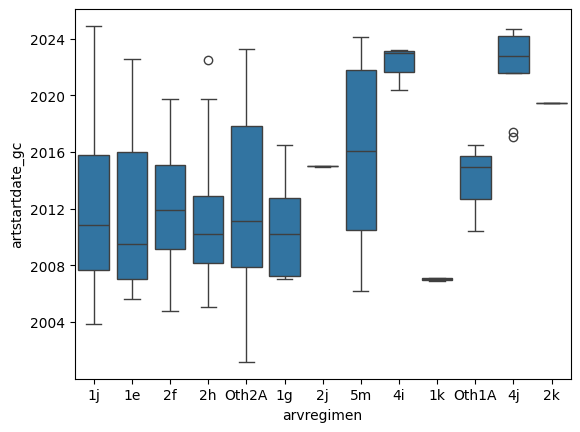

In [30]:
#To know vertical distribution of ART_start_date against categorical variables of ARV_Regimen
sns.boxplot(x="arvregimen", y="artstartdate_gc", data=df)

plt.show()



Overall Observations:

Distribution: The data appears to be skewed to the right in most categories, as indicated by the longer whisker on the right side of the boxplots.
Range: There is a wide range in the values for each category, with some outliers present.
Median: The median value for each category varies, with some categories having medians closer to the lower quartile and others closer to the upper quartile.

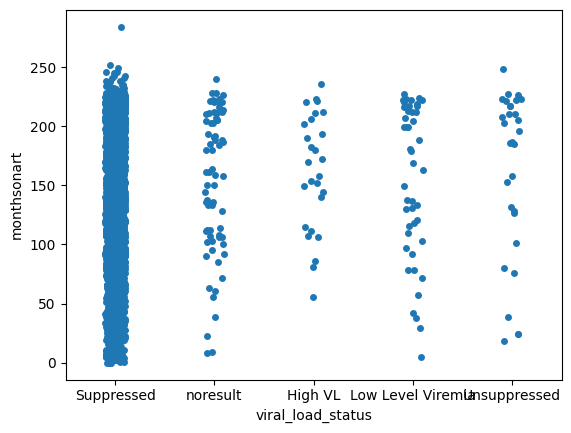

In [31]:
#stripplot() is used to draw a scatterplot where one variable is categorical
sns.stripplot(x="viral_load_status", y="monthsonart", data=df)

plt.show()

Overall:

The plot shows the distribution of "months on ART" for different viral load status categories.

There is a clear difference in the distribution of months on ART across the viral load status categories.
Specific Observations:

**Suppressed:** This category has the largest number of data points and the distribution is skewed to the right, indicating that a majority of people in this group have been on ART for a longer duration.

**No result:** This category has a smaller number of data points compared to "Suppressed" and the distribution is also skewed to the right.

**High VL:** This category has a relatively smaller number of data points compared to "Suppressed" and "No result". The distribution appears to be more spread out with some individuals having been on ART for a longer duration.

**Low Level Viremia:** This category has a smaller number of data points compared to "Suppressed" and "No result". The distribution is also skewed to the right.

**Unsuppressed:** This category has the smallest number of data points. The distribution is skewed to the right, indicating that a majority of people in this group have been on ART for a longer duration.
Possible Interpretations:

The longer duration on ART for individuals in the "Suppressed" category might suggest that ART is effective in suppressing the virus.
The distribution of months on ART in the "No result" category might indicate that there are challenges in obtaining viral load test results.
The presence of individuals with a longer duration on ART in the "High VL" category might suggest that some individuals may not be adhering to their treatment regimen or may have drug resistance.
The distribution of months on ART in the "Low Level Viremia" and "Unsuppressed" categories might indicate that there are challenges in achieving and maintaining viral suppression in these groups.

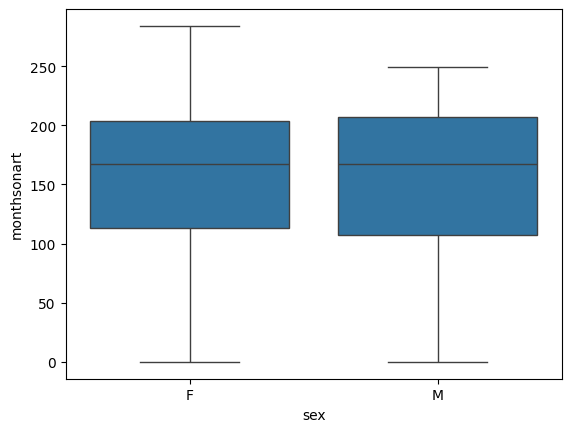

In [32]:
sns.boxplot(x='sex', y='monthsonart', data=df)
plt.show()

Here are some observations based on the provided boxplot:

Overall:

The plot shows the distribution of "months on ART" for different sexes (Female and Male).

There doesn't appear to be a significant difference in the distribution of months on ART between the two sexes.
Specific Observations:

**Female:** The distribution is skewed to the right, indicating that a majority of females have been on ART for a longer duration. There are a few outliers on the higher end.

**Male:** The distribution is also skewed to the right, with a similar pattern to females. There are a few outliers on the higher end.
Possible Interpretations:

The similar distribution of months on ART between the two sexes suggests that sex may not be a major factor influencing the duration of ART in this population.

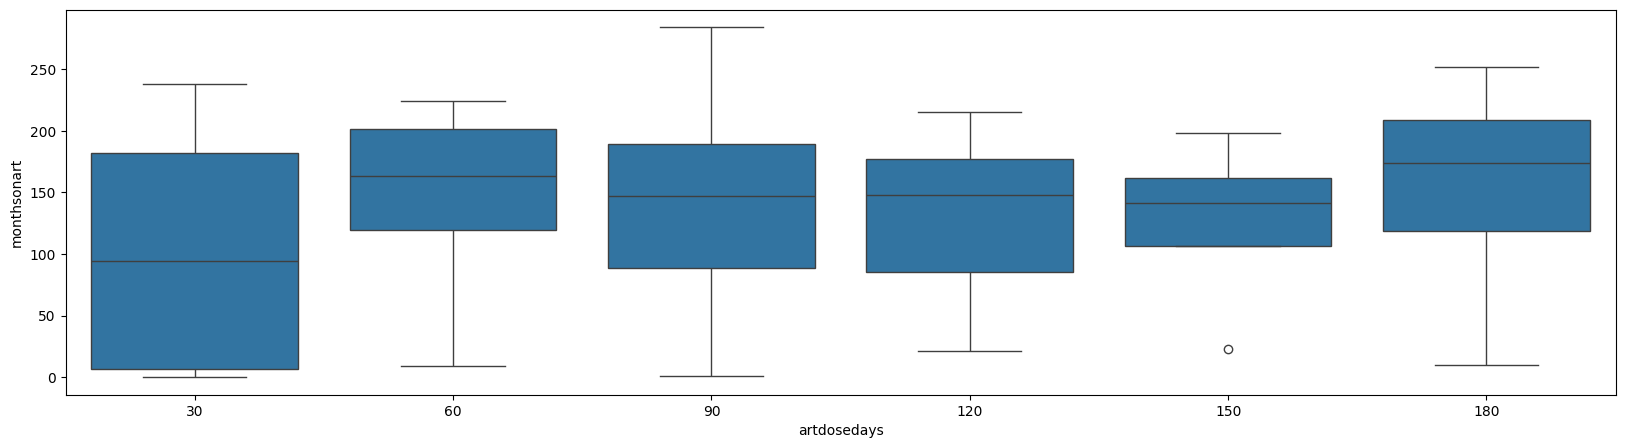

In [33]:
plt.rcParams['figure.figsize']=(20,5)
ax = sns.boxplot(x='artdosedays', y='monthsonart', data=df)

Overall Observations:

The plot shows the distribution of "months on ART" for different categories of "artdosedays".
There is a general trend of increasing months on ART as "artdosedays" increases. However, the relationship is not perfectly linear

Possible Interpretations:

The increasing trend in months on ART with increasing "artdosedays" suggests that individuals who have been on ART for a longer duration tend to have a higher number of days on which they received their medications.

This could be due to various factors such as better adherence to treatment, fewer missed doses, or access to consistent medication supplies.

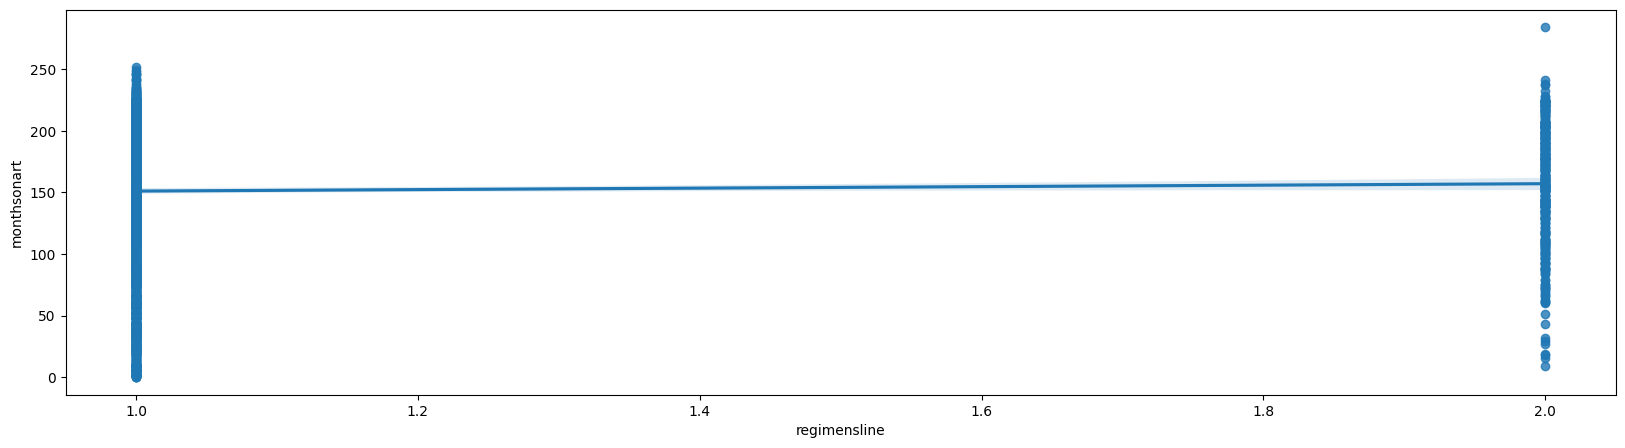

In [34]:
#To create a scatter plot with a regression line
sns.regplot(x="regimensline", y="monthsonart", data=df)

plt.show()

Overall Observations:

The plot shows the relationship between "months on ART" and "regimensive".
There appears to be a weak relationship between the two variables.
The data points are spread out, with no clear pattern or trend.

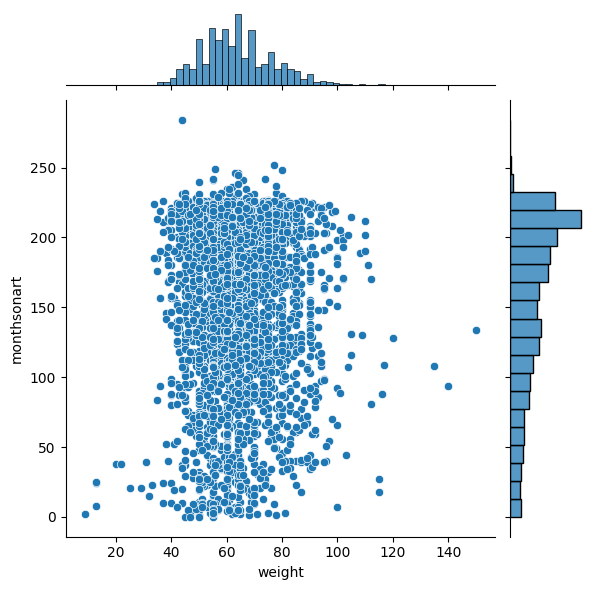

In [35]:
sns.jointplot(x="weight", y="monthsonart", data=df)


**overall Observations:**

The plot shows the relationship between "months on ART" and "weight" along with their individual distributions.
There appears to be a weak positive correlation between the two variables.
The data points are spread out, with no clear pattern or trend.

**Specific Observations:**

**Distribution of "months on ART":** The distribution is skewed to the right, indicating that a majority of individuals have been on ART for a longer duration.

**Distribution of "weight":** The distribution is also skewed to the right, with a peak around 60-70 kg.
Relationship between "months on ART" and "weight": There is a slight positive trend, suggesting that individuals with higher weights might have been on ART for a longer duration. However, the relationship is not very strong and there is a lot of variability in the data.

**Possible Interpretations:**

The weak positive correlation between "months on ART" and "weight" could be due to various factors such as overall health status, access to healthcare, and socioeconomic factors.
It's important to note that this correlation does not necessarily imply causation.

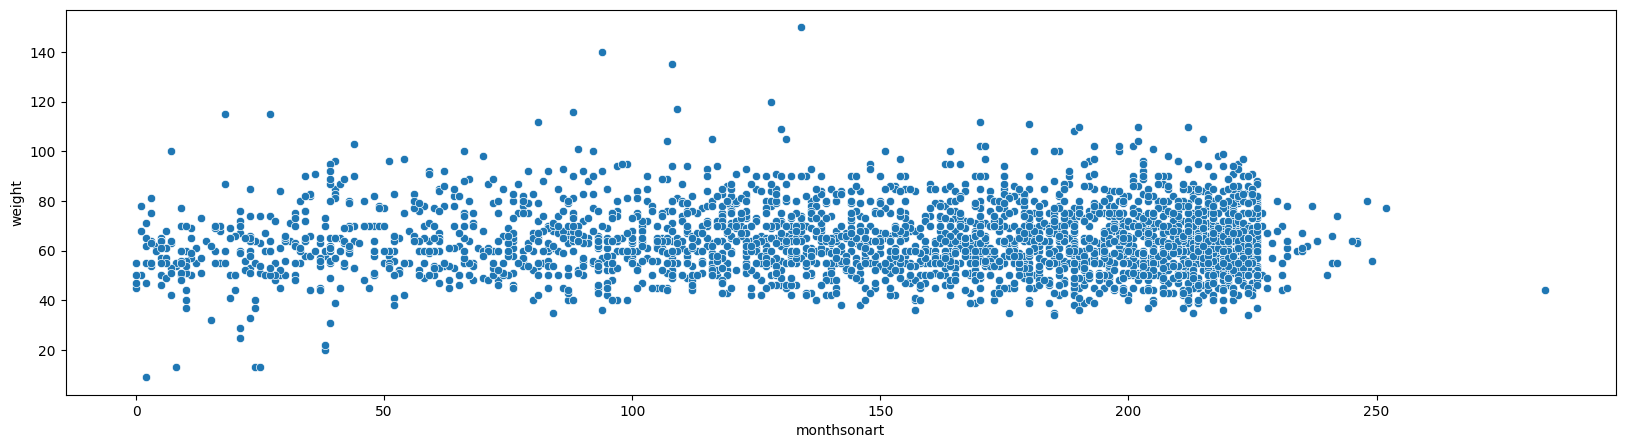

In [36]:
sns.scatterplot(x="monthsonart", y="weight", data=df)
plt.show()

**Overall Observations:**

The plot shows the relationship between "months on ART" and "weight" with "months on ART" on the x-axis and "weight" on the y-axis.
The data points are spread out, with no clear pattern or trend.
Specific Observations:

**Distribution of "months on ART":** The distribution appears to be skewed to the right, indicating that a majority of individuals have been on ART for a longer duration.

**Distribution of "weight":** The distribution of weight appears to be relatively normal, with a peak around 60-70 kg.
Possible Interpretations:

The lack of a clear relationship between "months on ART" and "weight" suggests that the duration of ART may not have a significant impact on weight in this population.

# Univariate Analysis

we try to plot univariate distribution by seaborn to understand the distribution in 'weight' of ART clients.

C:\Users\Sami\AppData\Local\Temp\ipykernel_14148\3941653390.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['weight'])


<Axes: xlabel='weight', ylabel='Density'>

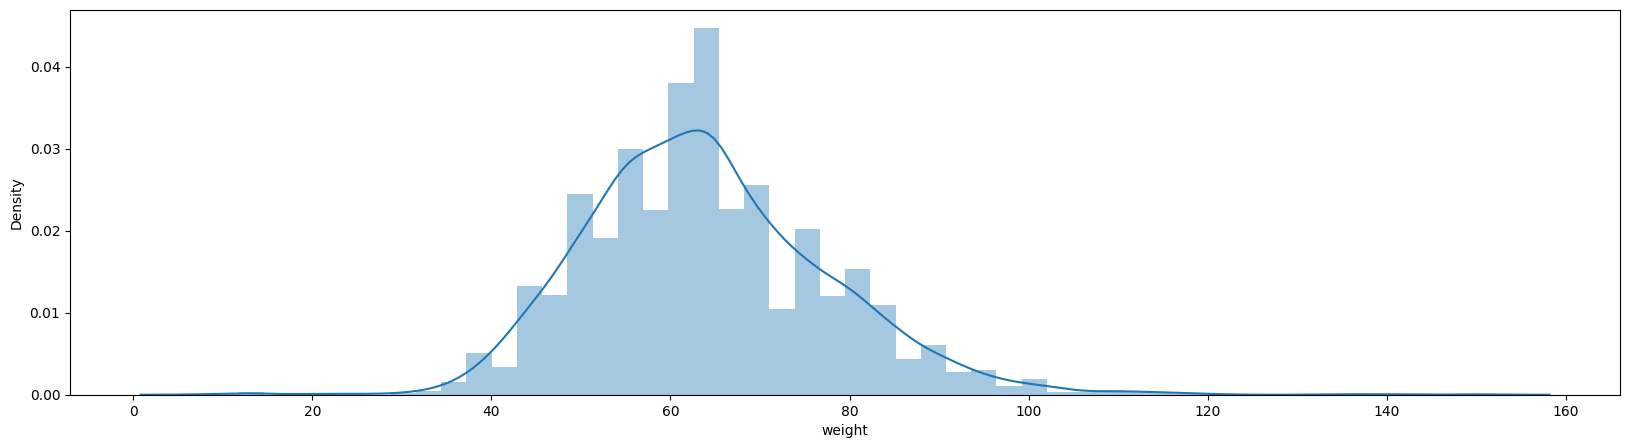

In [37]:
sns.distplot(df['weight'])

**Overall Observations:**

The plot shows the distribution of "weight" in the dataset.
The distribution is unimodal and skewed to the right.
The peak of the distribution is around 60-70 kg.

**Specific Observations:**

Histogram: The histogram provides a visual representation of the frequency of different weight values. The bars are taller in the middle range (60-70 kg) and become shorter towards the tails.
Density Plot: The density plot overlays a smooth curve on the histogram, providing a more continuous representation of the distribution. The curve also shows the peak around 60-70 kg and the rightward skew.

**Possible Interpretations:**

The right-skewed distribution indicates that there are more individuals with lower weights compared to higher weights.
The peak around 60-70 kg suggests that this is the most common weight range in the dataset.

In [38]:
df['monthsonart'].skew()

-0.6853540039901769

context of "monthsonart": A negative skew of -0.685 suggests that most clients have been on ART for a relatively longer duration (higher number of months), with fewer clients having been on ART for shorter durations. The negative value indicates the direction of the skew, and the magnitude (0.685) indicates the strength of the skew (moderate negative skew).

In summary: The observation is that the distribution of months on ART is moderately negatively skewed, indicating that a larger proportion of clients have been on ART for a longer period.

In [39]:
#df[df['monthsonart'] > 120].count() to know clients stay on art greater than Ten years
df[df['monthsonart'] > 120].count()

sex                           2122
weight                        2122
age                           2122
followupdate_gc               2122
arvregimen                    2122
regimensline                  2122
artdosedays                   2122
adherancelevel                2122
artstartdate_gc               2122
tb_sreeningstatus             2122
nutritionalscrenningstatus    2122
monthsonart                   2122
tpt_started_date              2122
tpt_completed_date            2122
viral_load_perform_date       2122
viral_load_status             2122
adherencelevel                2122
dtype: int64

**Identification of Long-Term Clients:** This approach effectively identifies clients who have been on antiretroviral therapy (ART) for an extended period, specifically those with a duration of treatment exceeding 10 years.

**Data Completeness Assessment:** The resulting count for each column provides valuable information about the completeness of data available for these long-term clients. Columns with lower counts might indicate missing data for specific variables, which could impact subsequent analyses.

**Enables Targeted Analysis:** This filtered dataset allows for focused analysis on the characteristics, health outcomes, and potential challenges associated with long-term ART use. This can inform interventions and support strategies tailored to the specific needs of this patient population.

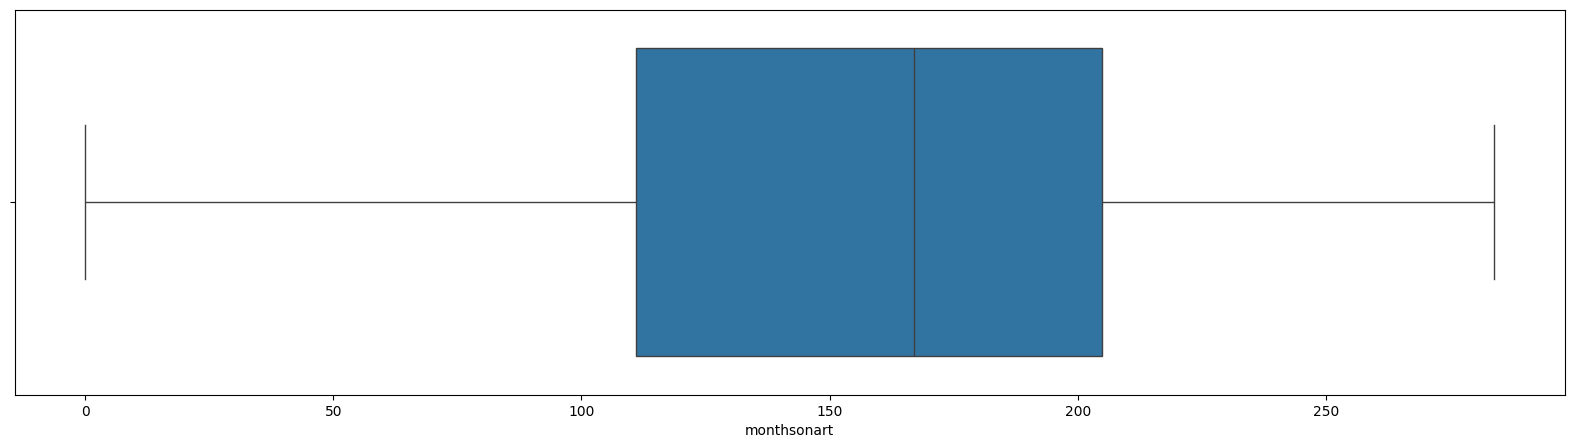

In [40]:
#To know the visualize the distribution of months on ART data
sns.boxplot(x=df["monthsonart"])

plt.show()

**Overall Observations:**

The plot shows the distribution of "months on ART" for a group of individuals.
The distribution appears to be relatively symmetrical with a few outliers.
Specific Observations:

**Median:** The median value for "months on ART" appears to be around 150, indicating that half of the individuals have been on ART for more than 150 months (12.5 years).

**Range:** The range of "months on ART" is quite wide, with some individuals having been on ART for significantly longer than others.

**Outliers:** There are a few outliers on the higher end of the distribution, suggesting that some individuals have been on ART for a very long time.
Possible Interpretations:

The distribution of "months on ART" suggests that there is a diverse group of individuals in terms of their duration on ART.
The presence of outliers indicates that some individuals have been on ART for a very long time, which may be due to various factors such as early diagnosis, access to healthcare, and adherence to treatment.

C:\Users\Sami\AppData\Local\Temp\ipykernel_14148\3552751057.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["monthsonart"])


<function matplotlib.pyplot.show(close=None, block=None)>

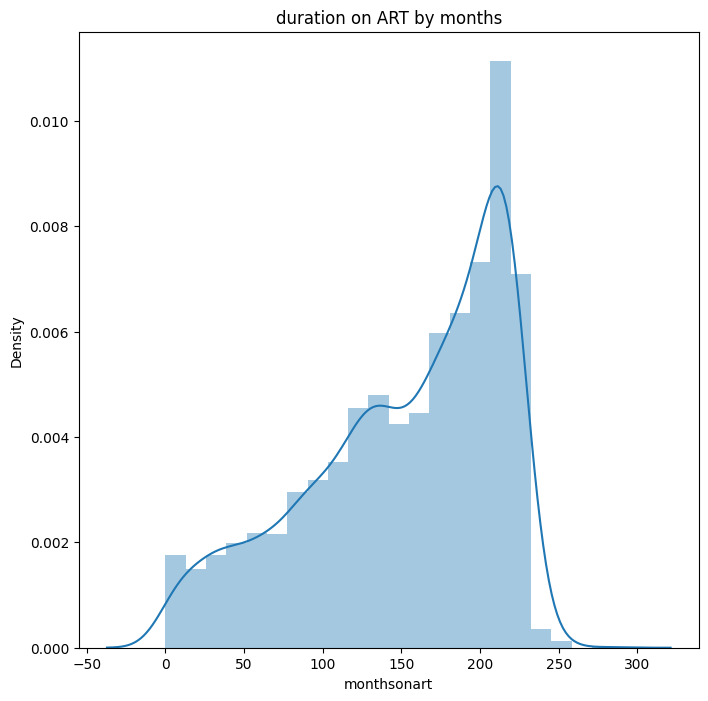

In [41]:
plt.figure(figsize=(8,8))
sns.distplot(df["monthsonart"])
plt.title('duration on ART by months')
plt.show

**Observations:**

**Distribution:** The distribution appears to be right-skewed, with a long tail towards higher values. This indicates that a majority of patients have been on ART for a relatively shorter duration, while a smaller proportion have been on it for a longer period.

**Peak**: The distribution peaks around the 200-month mark. This suggests that a significant number of patients have been on ART for approximately 16-17 years.

**Range:** The range of values extends from approximately 0 months to over 300 months (25 years). This indicates that the dataset includes patients who have been on ART for a wide range of durations, from recent initiation to long-term treatment.

In [42]:
df['monthsonart'].kurt()

-0.549502251140614

**observation:**

Negative Kurtosis: The value of kurtosis for the 'monthsonart' column is -0.549502251140614, which is negative. This indicates that the distribution of "months on ART" is platykurtic.

**Interpretation:**

**Platykurtic distribution:** A platykurtic distribution is flatter and has lighter tails compared to a normal distribution. This means that the data points are more spread out and there are fewer extreme values (outliers) than in a normal distribution.

**In the context of "months on ART":**

The negative kurtosis suggests that the distribution of the duration of ART among individuals is relatively flat. There might be a moderate number of individuals with very short or very long durations on ART, but the majority likely fall within a moderate range.

In [43]:
y= df["monthsonart"]

C:\Users\Sami\AppData\Local\Temp\ipykernel_14148\1947734239.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, kde=True, fit=st.norm)


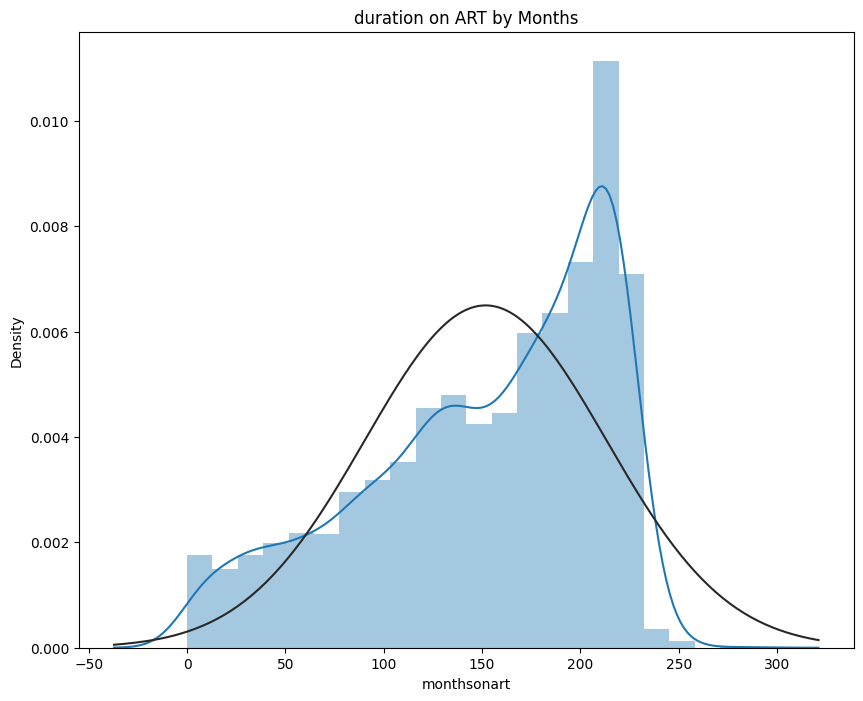

In [44]:
plt.figure(figsize=(10,8))
sns.distplot(y, kde=True, fit=st.norm)
plt.title('duration on ART by Months')
plt.show()

**overall Observations:**

The plot shows the distribution of "months on ART" for a group of individuals.
The distribution appears to be bimodal, with two distinct peaks.
Specific Observations:

**Two Peaks:** There are two prominent peaks in the distribution, one around 20 months and another around 200 months. This suggests that there might be two distinct groups of individuals with different durations on ART.

**Skewness:** The distribution appears to be slightly skewed to the right, indicating that there are more individuals with shorter durations on ART compared to longer durations.

**Density Curve:** The density curves overlaying the histogram provide a smooth representation of the distribution. The two peaks are more clearly visible in the density curves.

**Possible Interpretations:**

The bimodal distribution could be due to various factors such as differences in access to healthcare, treatment initiation patterns, or patient characteristics.
The skewness to the right suggests that a larger proportion of individuals have been on ART for a shorter duration.

In [45]:
df['viral_load_status'].value_counts()

viral_load_status
Suppressed           2816
noresult               73
Low Level Viremia      45
Unsuppressed           30
High VL                27
Name: count, dtype: int64

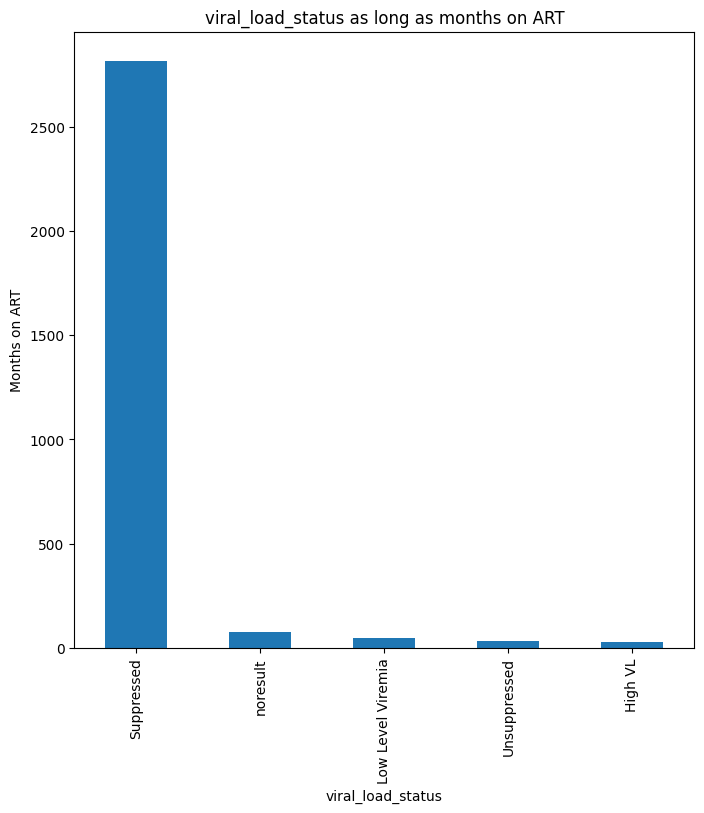

In [46]:
df['viral_load_status'].value_counts().plot(kind='bar',figsize=(8,8))
plt.title('viral_load_status as long as months on ART')
plt.ylabel('Months on ART')
plt.xlabel('viral_load_status')
plt.show()


**Observations:**

**Suppressed:** The largest group is "Suppressed" with 2816 individuals, indicating that a significant proportion of individuals have achieved viral suppression.

**No Result:** The second largest group is "No Result" with 73 individuals, suggesting that viral load tests may not have been conducted or results may not be available for this group.

**Low Level Viremia:** The third largest group is "Low Level Viremia" with 45 individuals, indicating that a smaller proportion of individuals have detectable but low levels of the virus.

**Unsuppressed:** The next largest group is "Unsuppressed" with 30 individuals, indicating that a portion of individuals have detectable viral loads, suggesting that the virus is not adequately suppressed.

**High VL:** The smallest group is "High VL" with 27 individuals, indicating that a relatively small proportion of individuals have high viral loads.
Possible Interpretations:

The high number of "Suppressed" individuals suggests that antiretroviral therapy (ART) is effective in suppressing the virus in a significant proportion of the population.

The presence of "No Result" and "Unsuppressed" individuals highlights the need for continued efforts to improve access to viral load testing and adherence to treatment.

The smaller proportion of individuals with "High VL" may indicate that interventions to prevent and manage drug resistance are having a positive impact.

In [47]:
df['nutritionalscrenningstatus'].value_counts()

nutritionalscrenningstatus
Normal            1426
OverWeight        1133
UnderNourished     250
Unknown            182
Name: count, dtype: int64

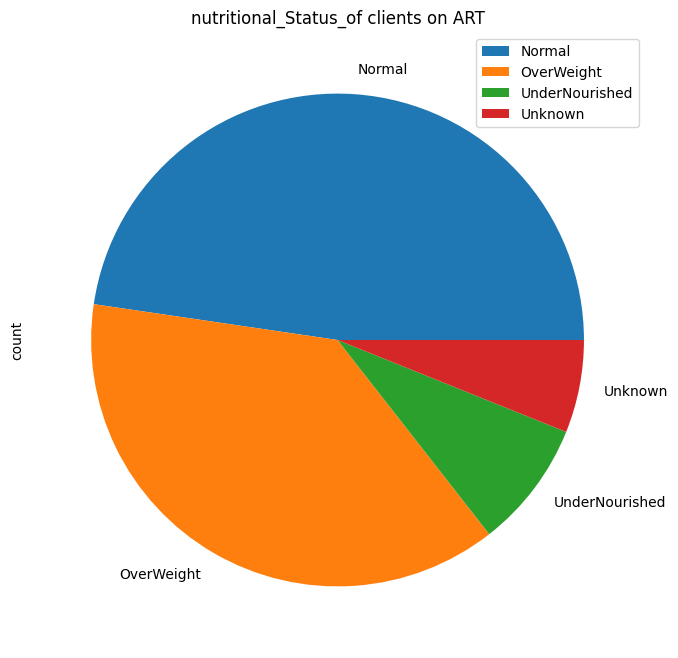

In [48]:
df['nutritionalscrenningstatus'].value_counts().plot(kind='pie',figsize=(8,8))
plt.title('nutritional_Status_of clients on ART')
plt.legend()
plt.show()

**Observations:**

**Normal:** The largest group is "Normal" with 1426 individuals, indicating that a significant proportion of individuals have a normal nutritional status.

**Overweight:** The second largest group is "Overweight" with 1133 individuals, suggesting that a considerable proportion of individuals are overweight.

**UnderNourished:** The third largest group is "UnderNourished" with 250 individuals, indicating that a portion of individuals are undernourished.

**Unknown:** The smallest group is "Unknown" with 182 individuals, indicating that the nutritional status is not known for this group.
Possible Interpretations:

The high number of individuals with a "Normal" nutritional status suggests that overall, nutritional status is relatively good in this population.
The presence of a significant number of individuals who are "Overweight" highlights the need for interventions to address overweight and obesity.
The presence of "UnderNourished" individuals indicates that there is a need to identify and address nutritional deficiencies in this population.
The "Unknown" category indicates that the nutritional status was not assessed for a portion of individuals, which could limit the understanding of the overall nutritional status of the population.

In [49]:
df['sex'].value_counts()

sex
F    1794
M    1197
Name: count, dtype: int64

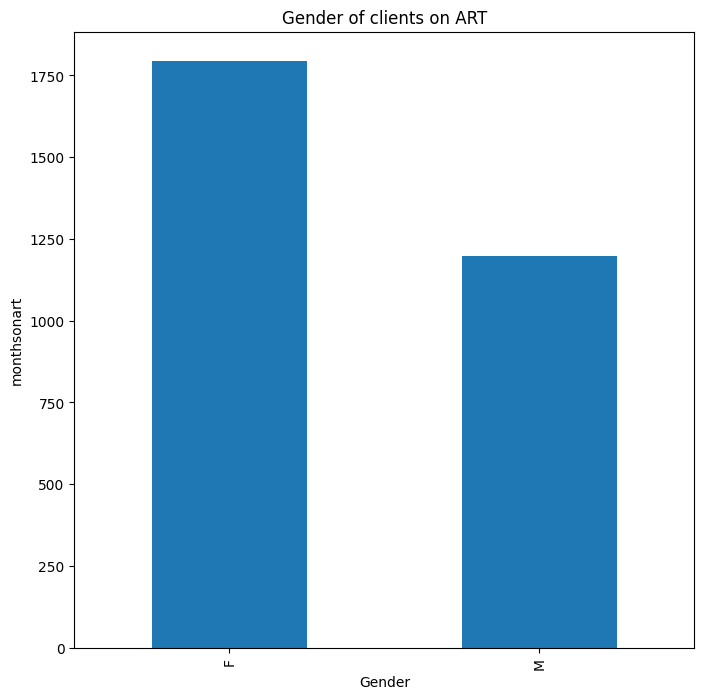

In [50]:
df['sex'].value_counts().plot(kind='bar',figsize=(8,8))
plt.title('Gender of clients on ART')
plt.ylabel('monthsonart')
plt.xlabel('Gender')
plt.show()

**Observations:**

**Female:** There are 1794 females in the dataset.
**Male:** There are 1197 males in the dataset.

**Possible Interpretations:**

This data suggests a slight female predominance in the population represented by this dataset.

In [51]:
df['tb_sreeningstatus'].value_counts()

tb_sreeningstatus
TB_Negative    2937
Unknown          49
TB_Positive       5
Name: count, dtype: int64

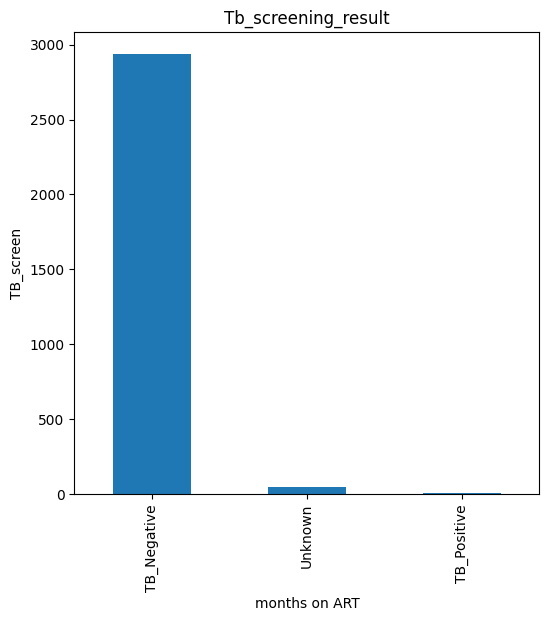

In [52]:
df['tb_sreeningstatus'].value_counts().plot(kind='bar', figsize=(6,6))
plt.title('Tb_screening_result')
plt.ylabel('TB_screen')
plt.xlabel('months on ART')
plt.show()

**Observations:**

**TB_Negative:** The largest group is "TB_Negative" with 2937 individuals, indicating that the majority of individuals screened negative for tuberculosis (TB).

**Unknown:** The second largest group is "Unknown" with 49 individuals, suggesting that TB screening status is unknown for this group.

**TB_Positive:** The smallest group is "TB_Positive" with 5 individuals, indicating that a very small proportion of individuals screened positive for TB.
Possible Interpretations:

The high number of "TB_Negative" individuals suggests that the prevalence of active TB in this population may be relatively low.

The presence of "Unknown" individuals indicates that TB screening may not have been conducted for all individuals in the population.
The presence of "TB_Positive" individuals highlights the importance of ongoing TB screening and treatment programs to identify and treat individuals with TB.

In [53]:
df['followupdate_gc'].value_counts()

followupdate_gc
2024-11-04    49
2024-09-30    44
2024-11-20    41
2024-11-25    40
2024-09-02    40
              ..
2024-07-07     1
2024-05-10     1
2024-05-09     1
2024-07-26     1
2024-05-03     1
Name: count, Length: 201, dtype: int64

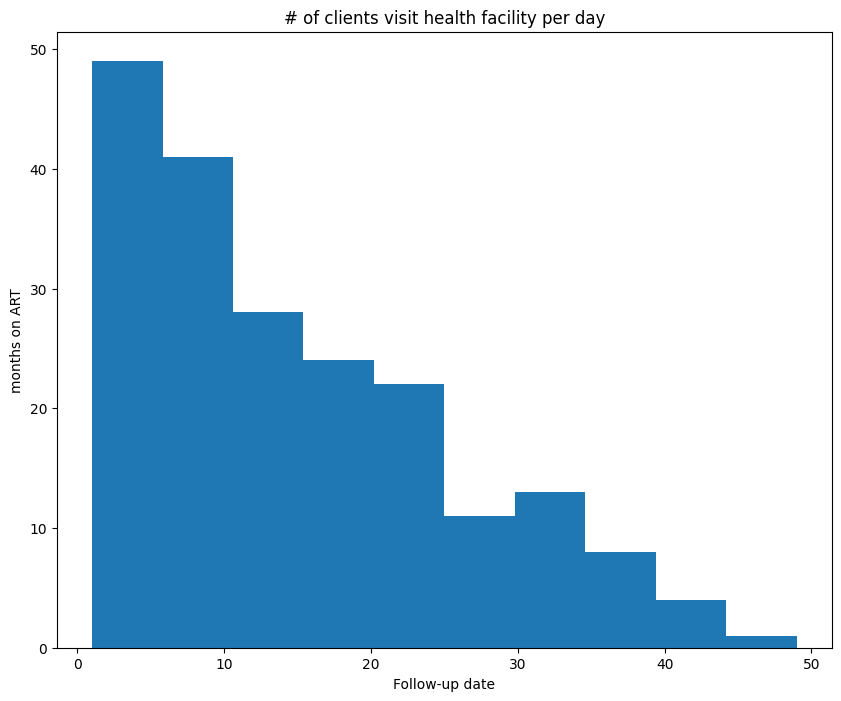

In [54]:
df['followupdate_gc'].value_counts().plot(kind='hist',figsize=(10,8))
plt.title('# of clients visit health facility per day')
plt.ylabel('months on ART')
plt.xlabel('Follow-up date')
plt.show()

**Overall Observations:**

The plot shows the distribution of the number of clients visiting a health facility per day over a period of time (likely represented by "Follow-up Date").
The distribution is skewed to the right, with a higher frequency of days with fewer client visits.

**Specific Observations:**

Peak: There's a peak in the number of client visits around the 0-5 days range, indicating that there are more days with a lower number of clients visiting the facility.

**Tail:** The distribution has a long tail towards the right, suggesting that there are some days with a higher number of client visits.

**Shape:** The overall shape of the distribution suggests that the number of client visits per day might not be evenly distributed.
Possible Interpretations:

The right-skewed distribution could indicate that there are certain days or periods with higher demand for services compared to others. This could be due to factors such as scheduled appointments, availability of healthcare providers, or community outreach activities.
The peak in the lower range of visits might suggest that there are more days with lower patient volume.

In [55]:
df['tpt_completed_date'].value_counts()

tpt_completed_date
status_unknown         273
2020-03-10 00:00:00     15
2020-02-03 00:00:00     14
2020-03-11 00:00:00     14
2016-11-11 00:00:00     12
                      ... 
2020-12-16 00:00:00      1
2010-07-06 00:00:00      1
2018-01-16 00:00:00      1
2013-02-03 00:00:00      1
2019-06-28 00:00:00      1
Name: count, Length: 1600, dtype: int64

In [56]:
# Select only numeric columns for correlation calculation
columns_to_include = ['artstartdate_gc', 'viral_load_perform_date', 'followupdate_gc', 'weight', 'regimensline','artdosedays', 'age','monthsonart']

In [57]:
numeric_df = df[columns_to_include]

In [58]:
correlation = numeric_df.corr()

In [59]:
correlation['monthsonart'].sort_values(ascending=True)

artstartdate_gc           -0.999989
viral_load_perform_date   -0.016581
followupdate_gc           -0.003911
weight                     0.022113
regimensline               0.033150
artdosedays                0.227560
age                        0.424953
monthsonart                1.000000
Name: monthsonart, dtype: float64

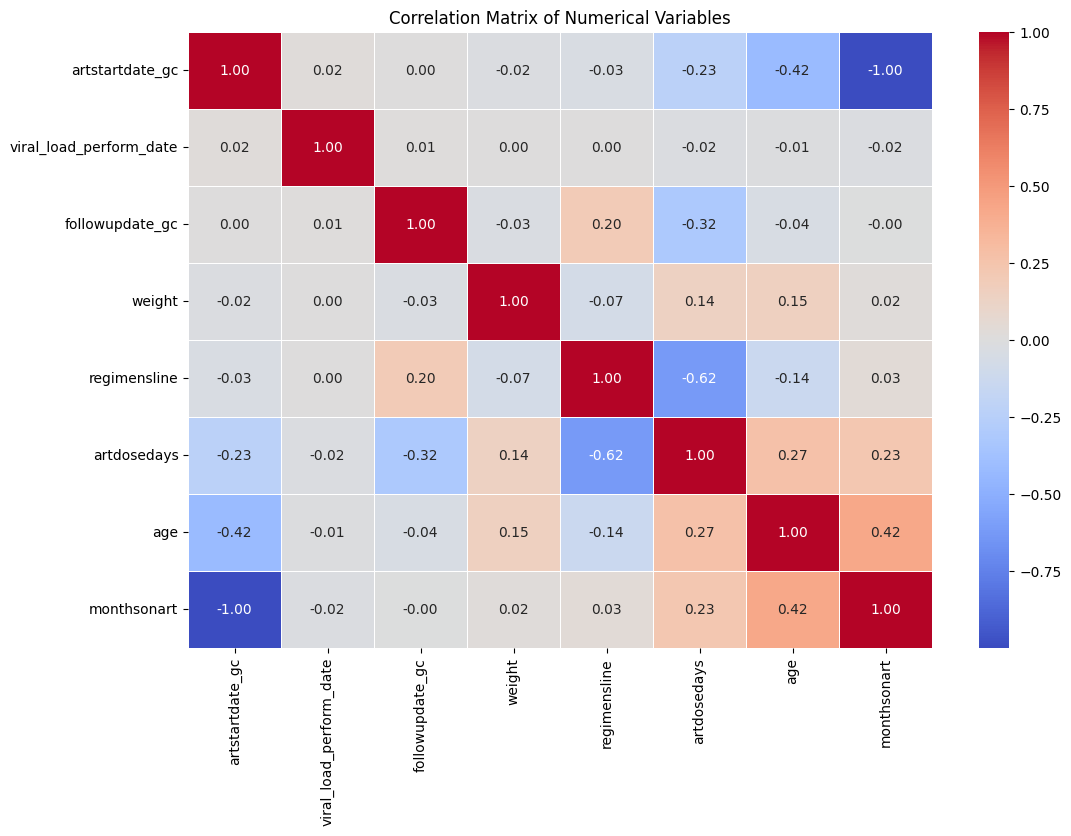

In [60]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

**Overall Observations:**

**Strongest Positive Correlation:** The strongest positive correlation is between 'artdosedays' and 'age' (0.27). This suggests that as the age of individuals increases, the number of days they are on antiretroviral therapy (ART) also tends to increase.

**Strongest Negative Correlation:** The strongest negative correlation is between 'artstartdate_gc' and 'monthsonart' (-1.00). This is expected, as individuals who started ART earlier would naturally have been on ART for a longer duration.

**Moderate Correlations:** There are moderate negative correlations between 'regimensline' and 'artdosedays' (-0.62) and between 'regimensline' and 'monthsonart' (-0.14). This might suggest that individuals who have changed their ART regimens more frequently tend to have shorter durations on therapy.
Weak Correlations: Most of the other correlations are weak, indicating that there are no strong linear relationships between the other pairs of variables.

**Specific Observations:**

**'artstartdate_gc':** This variable has strong negative correlations with 'monthsonart' and 'age', which is expected as individuals who started ART later would have been on it for a shorter duration and would be younger.

**'viral_load_perform_date': **This variable shows weak correlations with other variables, suggesting that the date of the viral load test is not strongly associated with other factors in the dataset.

**'followupdate_gc':** This variable has a moderate positive correlation with 'regimensline' (0.20), suggesting that individuals who have changed their ART regimens more frequently may also have more recent follow-up dates.

**'weight':** This variable shows weak correlations with other variables, indicating that weight is not strongly associated with other factors in the dataset.

**'regimensline': **This variable has moderate negative correlations with 'artdosedays' and 'monthsonart', as mentioned earlier.

**'artdosedays':** This variable has a moderate positive correlation with 'age' and a strong negative correlation with 'regimensline'.

**'age':** This variable has a moderate positive correlation with 'artdosedays' and a strong positive correlation with 'monthsonart'.

**'monthsonart':** This variable has strong negative correlations with 'artstartdate_gc' and 'regimensline' and a moderate positive correlation with 'age'.

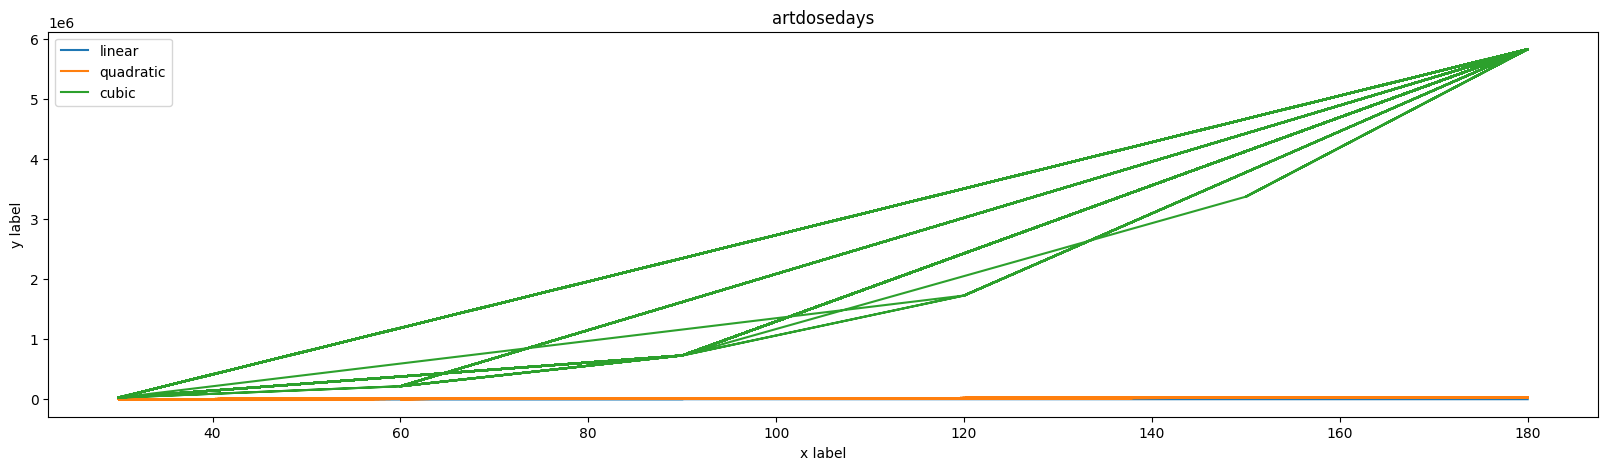

In [61]:
x=df['artdosedays']
plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("artdosedays")

plt.legend()

plt.show()

**Overall Observations:**

The plot appears to be visualizing the relationship between two variables, likely "artdosedays" and another variable (represented on the y-axis).
The plot includes multiple lines, possibly representing different models or trends.

**Specific Observations:**

**Linear Trend:** The "linear" line appears to have a relatively consistent slope, suggesting a linear relationship between the two variables.

**Quadratic and Cubic Trends:** The "quadratic" and "cubic" lines show more curvature, suggesting a non-linear relationship between the variables. The cubic line exhibits the most pronounced curvature.

**Data Points:** The presence of data points along the lines indicates the actual data points used to fit the models.
Possible Interpretations:

The plot suggests that there might be a non-linear relationship between "artdosedays" and the variable on the y-axis. The cubic model appears to capture the relationship better than the linear or quadratic models.
The data points deviating from the lines indicate that the models may not perfectly fit the data, suggesting that there might be other factors influencing the relationship between the variables.

# Multivariate Analysis

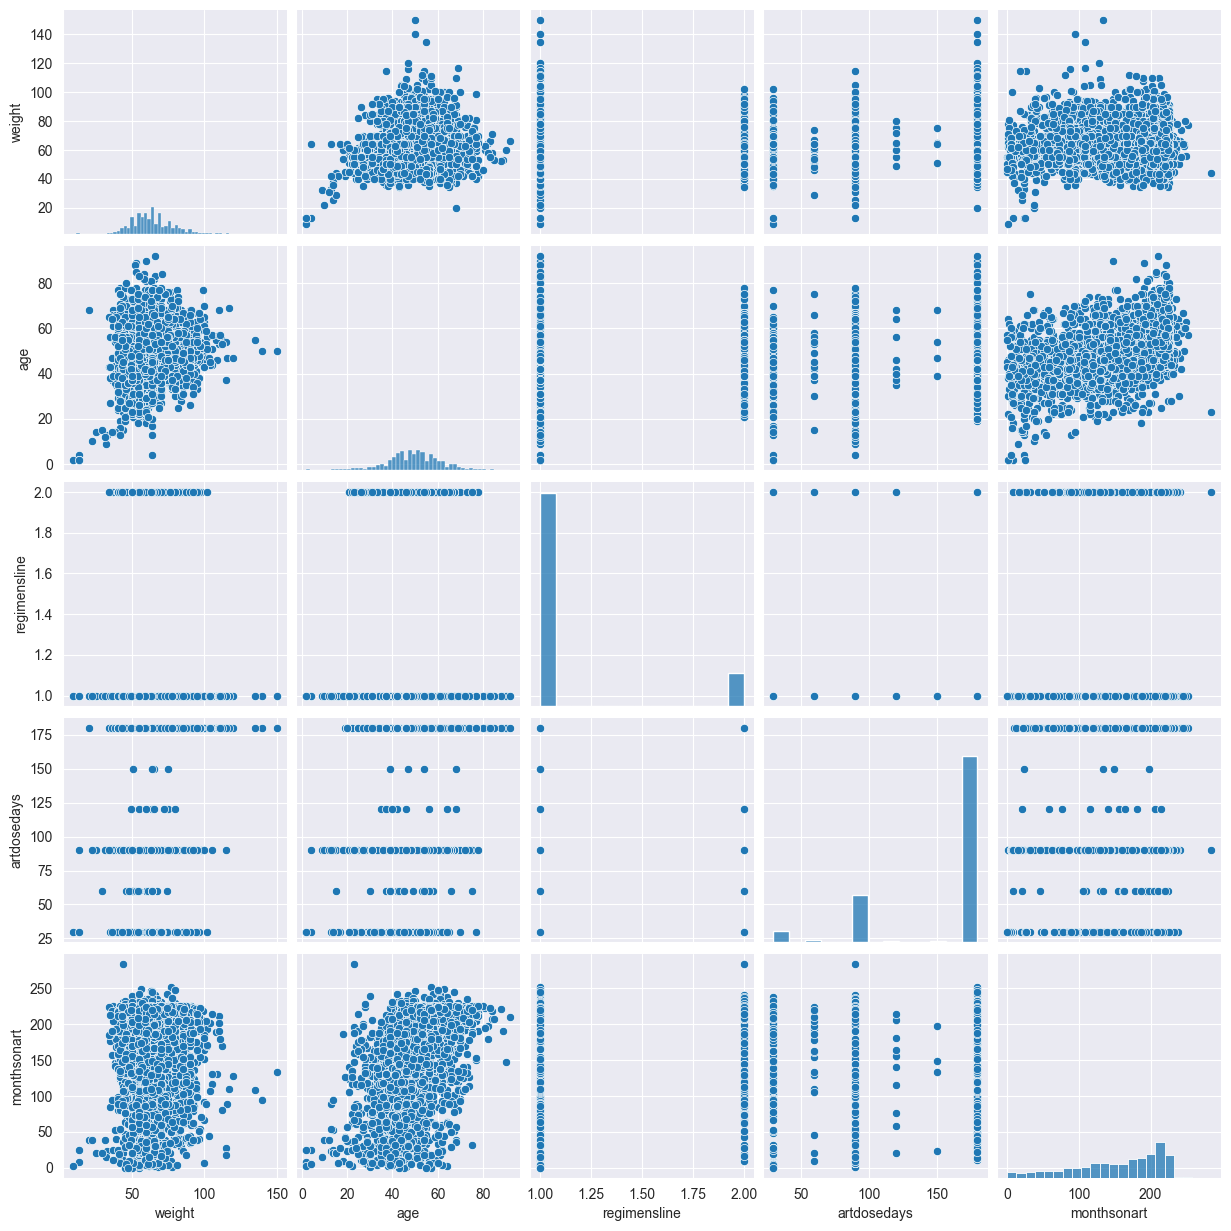

In [62]:
sns.set_style("darkgrid")

sns.pairplot(df)

plt.show()

**Overall Observations:**

The plot visualizes the pairwise relationships between several variables: weight, age, regimensline, artdosedays, and monthsonart.
Each cell in the matrix represents a scatter plot showing the relationship between two variables.
The diagonal cells show the distribution of each individual variable.
Specific Observations:

**Weight vs. Age:** There appears to be a weak positive correlation between weight and age. As age increases, weight tends to increase slightly.

**Weight vs. Regimensline:** There is no apparent linear relationship between weight and regimensline.

**Weight vs. Artdosedays:** There is no clear linear relationship between weight and artdosedays.

**Weight vs. Monthsonart:** There seems to be a slight positive correlation between weight and monthsonart. Individuals who have been on ART for longer durations might tend to have slightly higher weights.

**Age vs. Regimensline:** There appears to be a weak positive correlation between age and regimensline. Older individuals might have undergone more regimen changes.

**Age vs. Artdosedays:** There appears to be a moderate positive correlation between age and artdosedays. Older individuals tend to have been on ART for longer durations and, consequently, have more days on ART.

**Age vs. Monthsonart:** There appears to be a strong positive correlation between age and monthsonart. Older individuals have likely been on ART for a longer duration.

**Regimensline vs. Artdosedays:** There appears to be a moderate negative correlation between regimensline and artdosedays. Individuals who have changed regimens more frequently tend to have fewer days on ART.

**Regimensline vs. Monthsonart:** There appears to be a weak negative correlation between regimensline and monthsonart. Individuals who have changed regimens more frequently might have been on ART for a shorter duration.

**Artdosedays vs. Monthsonart:** There appears to be a strong positive correlation between artdosedays and monthsonart. Individuals who have been on ART for longer durations would naturally have more days on ART.

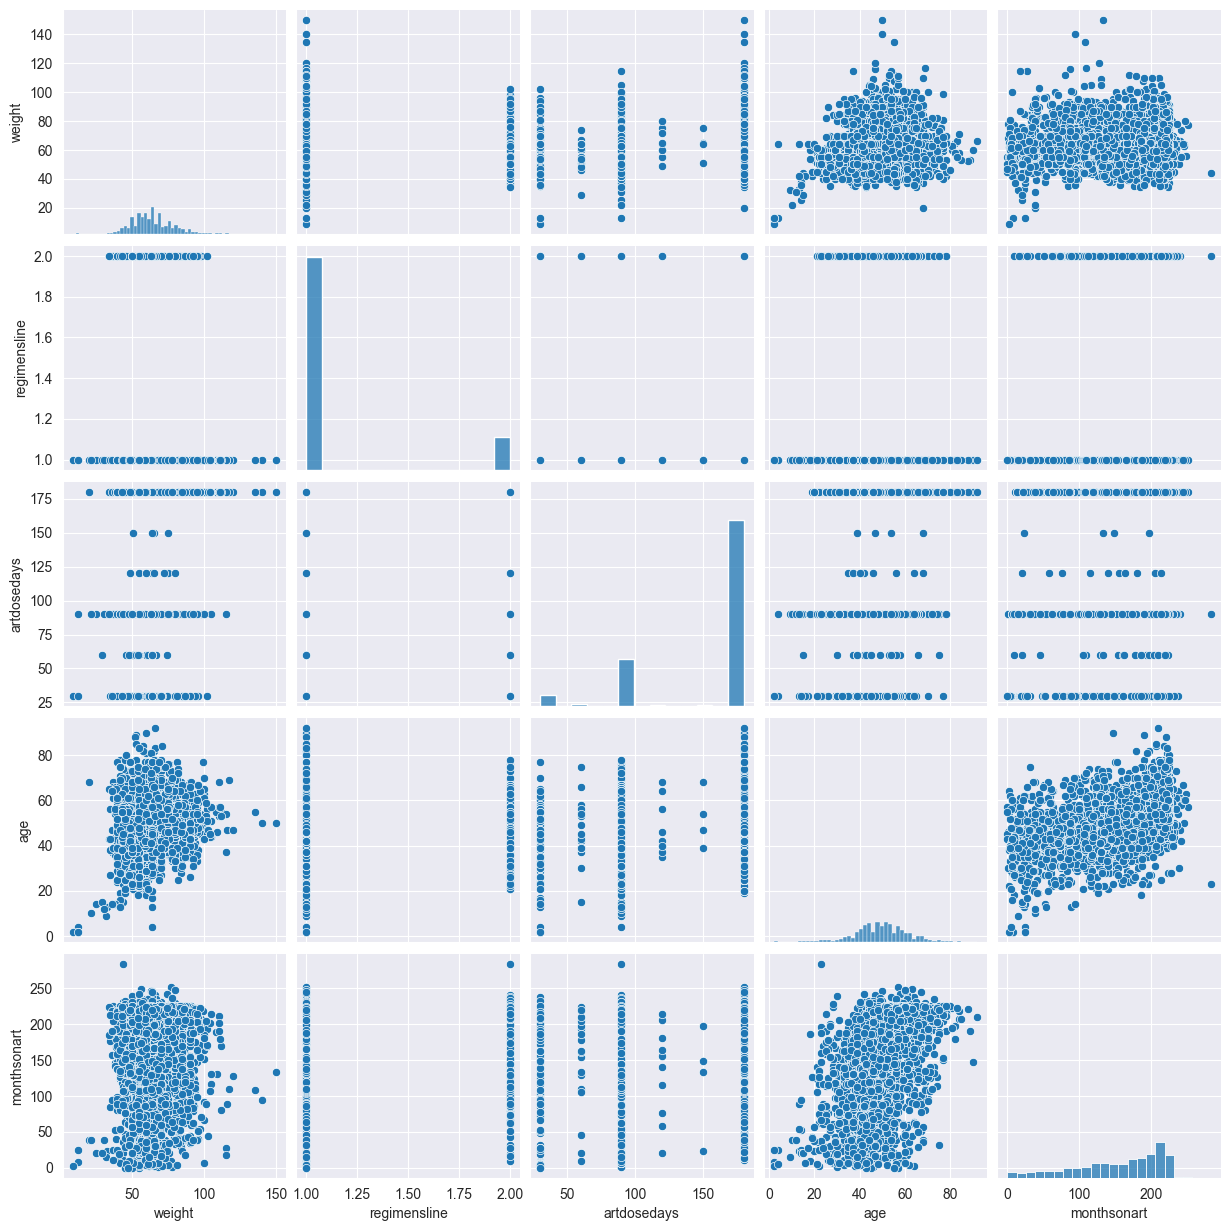

In [63]:
#paired plot
num_var = ['weight', 'regimensline', 'artdosedays', 'age',
           'monthsonart']
sns.pairplot(df[num_var], kind='scatter', diag_kind='hist')
plt.show()

**Overall Observations:**

The plot visualizes the pairwise relationships between several variables: weight, age, regimensline, artdosedays, and monthsonart.
Each cell in the matrix represents a scatter plot showing the relationship between two variables.
The diagonal cells show the distribution of each individual variable.
Specific Observations:

**Weight vs. Age:** There appears to be a weak positive correlation between weight and age. As age increases, weight tends to increase slightly.

**Weight vs. Regimensline:** There is no apparent linear relationship between weight and regimensline.

**Weight vs. Artdosedays:** There is no clear linear relationship between weight and artdosedays.

**Weight vs. Monthsonart:** There seems to be a slight positive correlation between weight and monthsonart. Individuals who have been on ART for longer durations might tend to have slightly higher weights.

**Age vs. Regimensline:** There appears to be a weak positive correlation between age and regimensline. Older individuals might have undergone more regimen changes.

**Age vs. Artdosedays:** There appears to be a moderate positive correlation between age and artdosedays. Older individuals tend to have been on ART for longer durations and, consequently, have more days on ART.

**Age vs. Monthsonart:** There appears to be a strong positive correlation between age and monthsonart. Older individuals have likely been on ART for a longer duration.

**Regimensline vs. Artdosedays:** There appears to be a moderate negative correlation between regimensline and artdosedays. Individuals who have changed regimens more frequently tend to have fewer days on ART.

**Regimensline vs. Monthsonart:** There appears to be a weak negative correlation between regimensline and monthsonart. Individuals who have changed regimens more frequently might have been on ART for a shorter duration.

**Artdosedays vs. Monthsonart:** There appears to be a strong positive correlation between artdosedays and monthsonart. Individuals who have been on ART for longer durations would naturally have more days on ART.

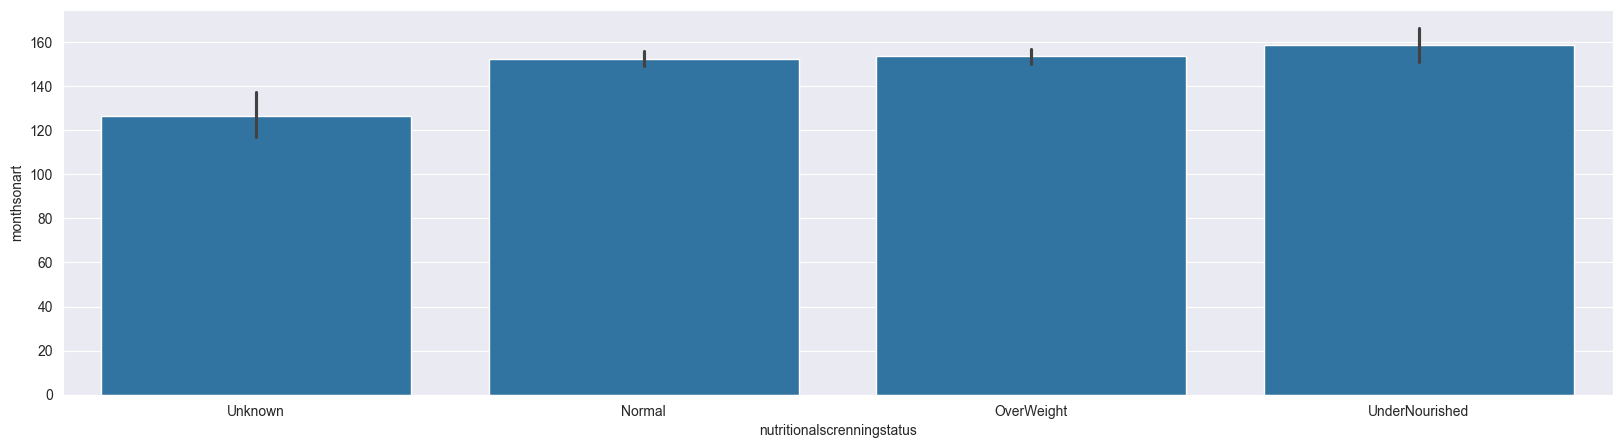

In [64]:
#To visualize the seaborn plot of categorical variable with numeric variable by bar chart.
sns.barplot(x="nutritionalscrenningstatus", y="monthsonart", data=df)

plt.show()


**Overall Observations:**

The plot shows the relationship between "months on ART" and "nutritionalscrenningstatus".
The y-axis represents "months on ART" and the x-axis represents the different categories of "nutritionalscrenningstatus".
The height of each bar represents the average "months on ART" for individuals in that particular nutritional screening status category.

**Specific Observations:**

**Unknown:** Individuals with an "Unknown" nutritional screening status have the lowest average "months on ART".

**Normal, OverWeight, UnderNourished:** Individuals in the "Normal," "OverWeight," and "UnderNourished" categories have similar average "months on ART," with the "UnderNourished" group having slightly higher average months on ART compared to the other two.
Possible Interpretations:

The similar average "months on ART" across the "Normal," "OverWeight," and "UnderNourished" categories suggest that nutritional status may not have a significant impact on the duration of ART in this population.
The lower average "months on ART" for the "Unknown" category could be due to various factors, such as incomplete data or differences in the characteristics of individuals in this group.